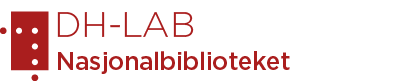

In [1]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
from dhlab.module_update import css
import networkx as nx
%matplotlib inline
plot = lambda x, lw=5: x.plot(figsize=(10,5), lw=lw)

D:\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
css()

# 1. N-gramdata

Data kan hentes fra [NB N-gram](https://www.nb.no/sp_tjenester/beta/ngram_1/trends#ngram/query?terms=demokrati%2C+diktatur&lang=all&case_sens=0&freq=rel&corpus=bok) med kommandoen `nb_ngram(<ord>, periode)`. Dataene utgjør en **dataramme** som kan analyseres og plottes. 


`smooth` er et parameter for glatting. Forekomsten av et ord er til en viss grad styrt av tilfeldigheter, for eks. hvilke bøker som ble utgitt ett bestemt år: For å rette noe på denne skjevheten, «glattes» resultatene ut før de vises. Glatting vil si at relativfrekvensen for ett år beregnes som et gjennomsnitt av frekvensen i dette og et visst antall forutgående og etterfølgende år: En glatting på fire innebærer at resultatene for fire år før og fire år etter legges sammen med dem for det aktuelle året, delt på ni (antall år totalt). Dette gjør kurvene jevnere enn i rådataene hvor det er langt mer spisse topper.

`corpus` er satt til *bok* som default, skriv `corpus='avis'` for å søke i aviser.

## 1.1. Plotting av trendlinjer

Lag en figur med egendefinert (se over) kommando `plot(<ngram dataramme>)` eller bruk innebygd Python `<ngram>.plot(...)`

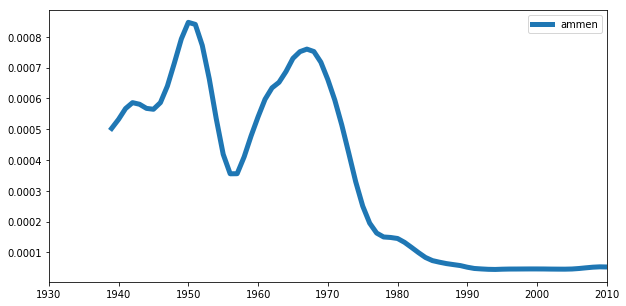

In [4]:
plot(nb.nb_ngram("ammen", smooth=10, years=(1930, 2010)));

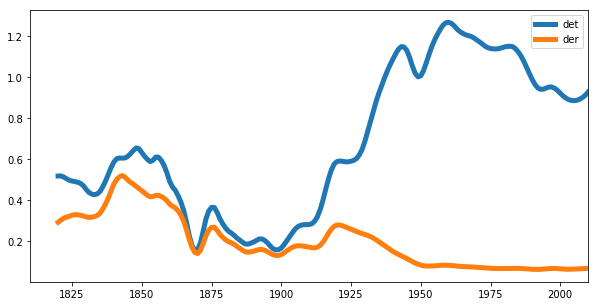

In [5]:
plot(nb.nb_ngram("det, der", smooth=10, corpus='avis', years=(1810, 2010)));

# 2. Galakser


Galaksene måler koblinger mellom ord, og kan brukes for å lage sett av ord til forskjellige formål, som for eksempel sentimentanalyse, eller stedsnavn.

For engelsk og tysk er grunnlagsmaterialet [Google n-gram](https://books.google.com/ngrams/graph?content=democracy&year_start=1800&year_end=2000&corpus=15&smoothing=3&share=&direct_url=t1%3B%2Cdemocracy%3B%2Cc0).

Kommanden er `make_graph(<ord>, lang=<språk-kode>)`

## 2.1. Definer en kobling

### 2.1.1. Engelsk

In [3]:
eng = nb.make_graph('democracy', lang = 'eng')

#### 2.1.1.1. Se på grafen

Grafer tegnes og analyseres med pakken [networkx](https://networkx.github.io/). Kommandoer er bygd over den pakken, og kommando for å vise grafen er `show_graph` fra modulen `graph_networkx_louvain`.

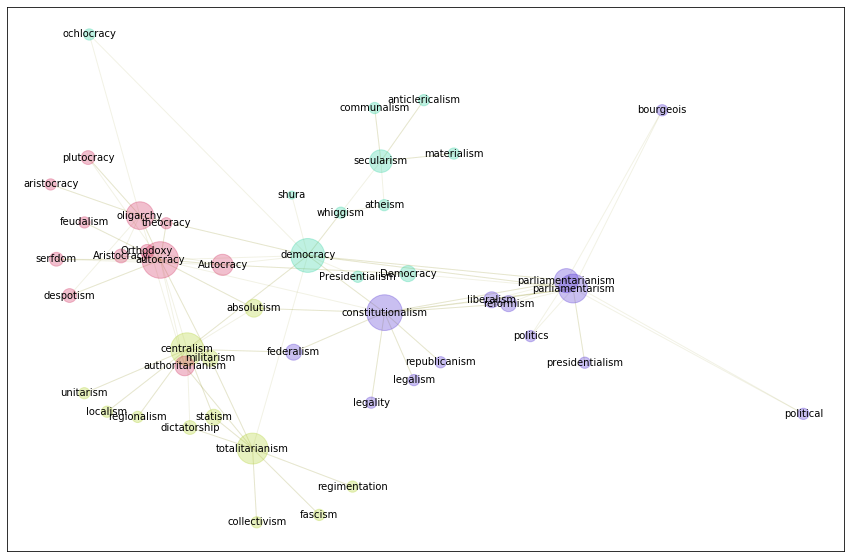

In [5]:
gnl.show_graph(eng, spread = 0.5)

#### 2.1.1.2. Clustre fra grafen

Bruk kommando `show_communities` fra `gnl` for å se på clustre.

In [6]:
gnl.show_communities(eng)

centralism-totalitarianism :  centralism, totalitarianism, absolutism, militarism, statism, dictatorship, localism, collectivism, unitarism, fascism, regimentation, regionalism

democracy-secularism :  democracy, secularism, Democracy, atheism, ochlocracy, materialism, whiggism, Presidentialism, communalism, anticlericalism, shura

constitutionalism-parliamentarism :  constitutionalism, parliamentarism, parliamentarianism, reformism, liberalism, federalism, legalism, republicanism, legality, presidentialism, politics, bourgeois, political

autocracy-oligarchy :  autocracy, oligarchy, Autocracy, authoritarianism, serfdom, plutocracy, Aristocracy, despotism, Orthodoxy, feudalism, theocracy, aristocracy



### 2.1.2. Tysk

In [7]:
ger = nb.make_graph('Demokratie', lang='ger')

#### 2.1.2.1. Se på grafen

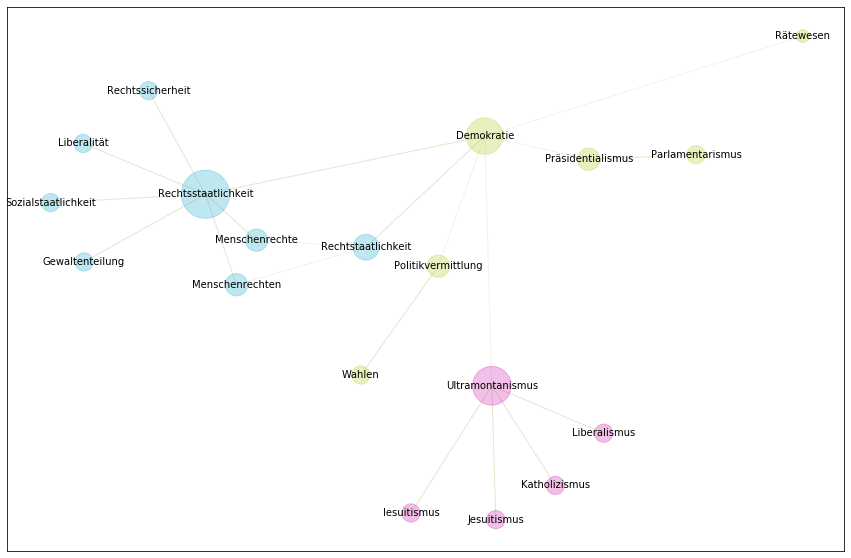

In [9]:
gnl.show_graph(ger, spread=0.5)

#### 2.1.2.2. Clustre fra tysk graf



In [10]:
gnl.show_communities(ger)

Demokratie-Präsidentialismus :  Demokratie, Präsidentialismus, Politikvermittlung, Parlamentarismus, Wahlen, Rätewesen

Rechtsstaatlichkeit-Rechtstaatlichkeit :  Rechtsstaatlichkeit, Rechtstaatlichkeit, Menschenrechten, Menschenrechte, Gewaltenteilung, Sozialstaatlichkeit, Liberalität, Rechtssicherheit

Ultramontanismus-Katholizismus :  Ultramontanismus, Katholizismus, Iesuitismus, Jesuitismus, Liberalismus



### 2.1.3. Norsk

In [11]:
g_is = nb.make_graph('demokrati', lang='nob')

#### 2.1.3.1. Se på grafen

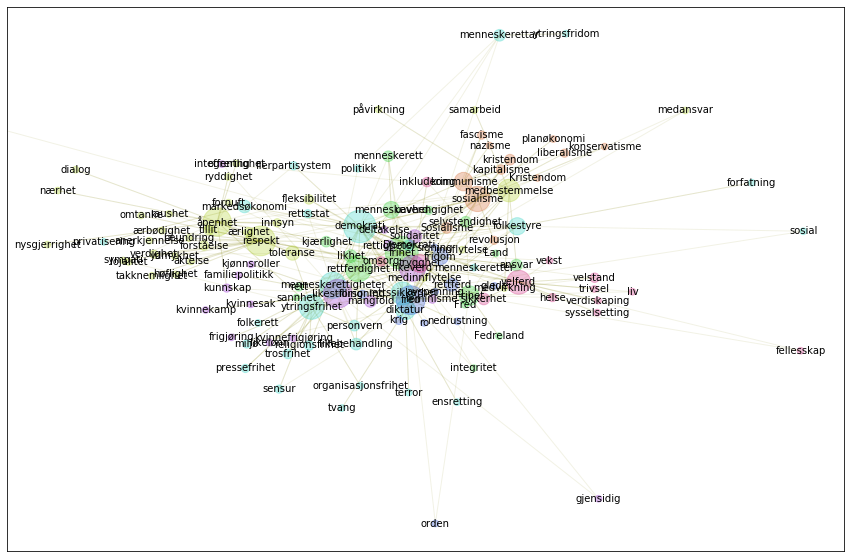

In [12]:
gnl.show_graph(g_is, spread=0.8)

#### 2.1.3.2. Clustre fra grafen

In [13]:
gnl.show_communities(g_is)

respekt-åpenhet :  respekt, åpenhet, medbestemmelse, toleranse, tillit, ærlighet, forståelse, fleksibilitet, verdighet, innsyn, beundring, ydmykhet, innflytelse, samarbeid, dialog, fornuft, lojalitet, sympati, medvirkning, anerkjennelse, ryddighet, nysgjerrighet, ærbødighet, nærhet, raushet, høflighet, offentlighet, takknemlighet, medinnflytelse, påvirkning, medansvar, aktelse, omtanke

frihet-rettferdighet :  frihet, rettferdighet, Frihet, menneskeverd, likhet, ansvar, selvstendighet, menneskerett, kjærlighet, rett, uavhengighet, Fred, integritet, Fedreland, Land, sannhet

demokrati-menneskerettigheter :  demokrati, menneskerettigheter, ytringsfrihet, rettssikkerhet, diktatur, folkestyre, markedsøkonomi, menneskerettar, likebehandling, Demokrati, personvern, trosfrihet, religionsfrihet, flerpartisystem, rettsstat, sensur, miljø, pressefrihet, forfatning, tvang, sosial, organisasjonsfrihet, menneskeretter, politikk, privatisering, folkerett, terror, ensretting, ytringsfridom, parlament

Tilbake til [DHLAB ved Nasjonalbiblioteket](https://nbviewver.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb)